## Import Libraries

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [82]:
import os

base_path = "/kaggle/input/brain-tumor-mri-dataset"

print(os.listdir(base_path))
print(os.listdir(base_path + "/Training"))
print(os.listdir(base_path + "/Testing"))


['Training', 'Testing']
['pituitary', 'notumor', 'meningioma', 'glioma']
['pituitary', 'notumor', 'meningioma', 'glioma']


## Load & Prepare Data

In [83]:
img_size = 128

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    "/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    "/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [84]:
print(train_data.class_indices)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


## CNN Model

In [85]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [86]:
# Use Adam optimizer, Softmax for multi-class, Metrics include accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Train Model (Epochs)

In [87]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 82s 559ms/step - accuracy: 0.5753 - loss: 0.9709 - val_accuracy: 0.6696 - val_loss: 0.8923
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 80s 545ms/step - accuracy: 0.8362 - loss: 0.4503 - val_accuracy: 0.7213 - val_loss: 0.6993
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 80s 556ms/step - accuracy: 0.8977 - loss: 0.2915 - val_accuracy: 0.7756 - val_loss: 0.6760
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 78s 547ms/step - accuracy: 0.9203 - loss: 0.2138 - val_accuracy: 0.7993 - val_loss: 0.6369
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 82s 548ms/step - accuracy: 0.9294 - loss: 0.1802 - val_accuracy: 0.7783 - val_loss: 0.8726
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 78s 547ms/step - accuracy: 0.9453 - loss: 0.1479 - val_accuracy: 0.8116 - val_loss: 0.8005
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 550ms/step - accuracy: 0.9560 - loss: 0.1184 - val_accuracy: 0.7923 - val_loss: 0.6900
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 582ms/step - accuracy: 0.9740 - loss: 0

In [88]:
train_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_dir  = "/kaggle/input/brain-tumor-mri-dataset/Testing"


## Test Accuracy

In [89]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1311 images belonging to 4 classes.


In [90]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.8464 - loss: 0.7582
Test Accuracy: 0.893211305141449


## Accuracy and loss graph

In [91]:
import matplotlib.pyplot as plt


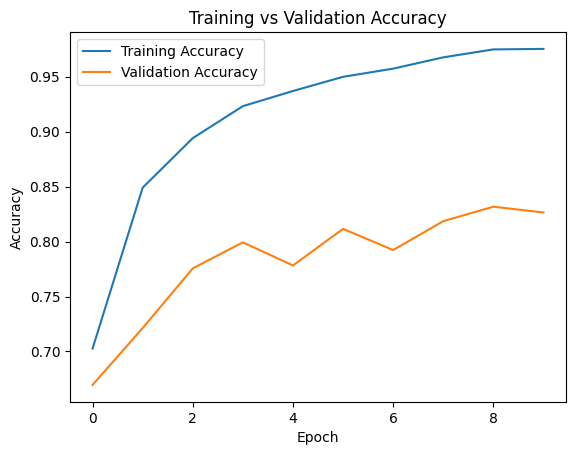

In [92]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

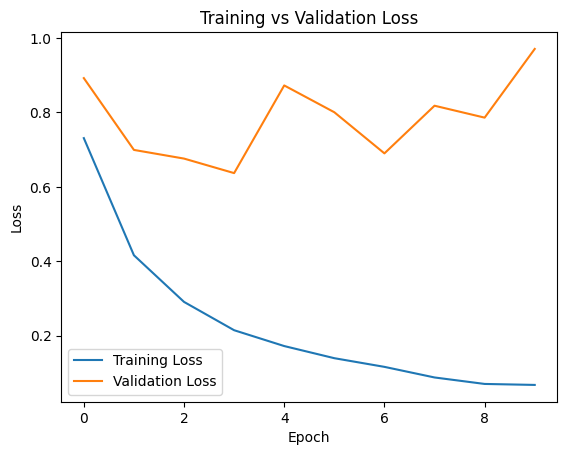

In [93]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

## Confusion Matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step


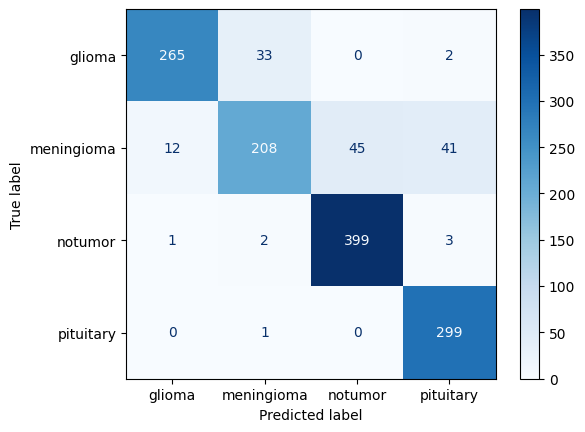

In [94]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues')
plt.show()
